Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Batsal Ghimire"
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [83]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    highest_rank = -float("inf") #Sets the initial highest rank to be the lowest number.
    hired = 0 #Initialize the initial number of hired people to be 0.
    n = len(applicants) #Captures the length of the list
    for i in range (n): #Iterates over every applicant through interiview
        if applicants[i]>highest_rank: #Checks if the applicant is better than the previous highest ranked one.
            highest_rank = applicants[i] #Changes the highest ranked applicant
            hired = hired + 1 #Adds one to update the number of hires
        else: #If the applicant is worsely ranked than the previous best.
            highest_rank = highest_rank #Don't change anything.
    return hired #Returns the number of hires

In [84]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [91]:
import random
def experimental_hires(N):
    times = 1000 #Number of times to get new samples
    hired = 0 #The number of hired applicants is set to 0
    for i in range(times): #Iterates through the number of time set prior.
        tot_app = random.sample(range(1,10000),N) #Creates a random list within the given range
        high_rank = -float("inf")
        for j in range(N):#Iterates through all N applicants
            if tot_app[j]>high_rank: #Checks if the applicant is better than the previous highest ranked one.
                high_rank = tot_app[j] #Changes the highest ranked applicant
                hired = hired + 1 #Adds one to update the number of hires
            else: #If the applicant is worsely ranked than the previous best.
                high_rank = high_rank
    return (hired/times) #Calculate the average.
experimental_hires(100)

5.189

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [30]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

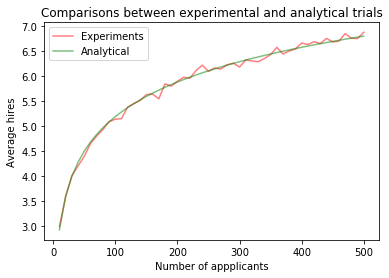

In [92]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
exp_tr = [] #List of experimental trials
ana_tr = [] #List of analytical trials
app = [] #List for applicants
for i in range (1,51): #Iterates through the list 50 times
    N = 10*i #Finds the number of applicants
    app.append(N) #Creates a list of number of applicants for the plot
    ana_tr.append(analytical_hires(N)) #Creates a list of average number of hires through each iteration through analytical trials
    exp_tr.append(experimental_hires(N)) #Creates a list of average number of hires through each iteration through experimental trials
    
plt.plot(app, exp_tr, color="red", alpha=0.5) #PLots the experimental trials
plt.plot(app, ana_tr, color='green',alpha=0.5) #Plots the analytical trials
plt.xlabel("Number of appplicants")
plt.ylabel("Average hires")
plt.title("Comparisons between experimental and analytical trials")
plt.legend(["Experiments", "Analytical"])
plt.show()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

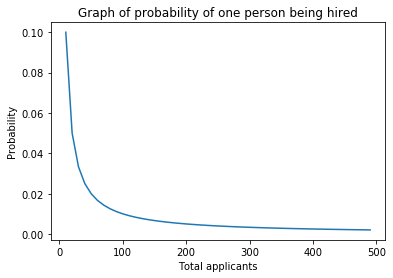

In [94]:
prob_one_hire = [] #sets the list of probabilities of having only one hire
apps = [] #List for number of applicants
n = 50
for i in range (1,n): #Number of times to iterate through the statements
    N = 10*i #Finds the number of applicants
    apps.append(N) #Creates a list of total applicants for plotting
    prob_one_hire.append((1/N)) #Finds the probability of finding one hire and adds to the list.
plt.plot(apps, prob_one_hire) #Plots the given data
plt.xlabel("Total applicants")
plt.ylabel("Probability")
plt.title("Graph of probability of one person being hired")
plt.show()

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [96]:
# YOUR CODE HERE

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

We definitely need to generate a random sample since we've been told that each of the attendents hats are unique  i.e. there are N unique hats. And, to find the number of correct hats, we need to randomize the sample.

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 would be the way to implement it. It first creates a list with the given size of the number of party attendents and then randomizes the list using the numpy shuffle command.

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [99]:
import numpy as np
import random
def hat_check(N): #Creates a function taking number of attendants as an argument
    hat_list = list(range(N)) #Creates the list of hats
    correct_ones = 0 #Sets the number of corrects ones to 0 to begin with
    np.random.shuffle(hat_list) #Randomizes the lsit
    for owner in range(N): #Runs the operation for each owner
        if hat_list[owner] == owner: #Checks if the hat belongs to the owner
            correct_ones += 1 #If true, adds one to the number of correct ones.
    return correct_ones

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

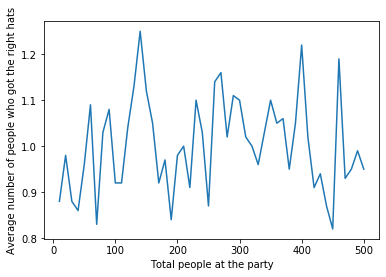

In [102]:
correct_hats = []
partiers  = []
for tr in range (1,51): #Number of trials
    N = 10*tr #Number of attendants increase every iteration
    partiers.append(N) #Adds the number of partiers to the list
    correct_hats.append(plt_hats(N)) #Calls the functions and adds the returned value to the list.
def plt_hats(N): #To find the average number of hats returned every trial
    trials = 100 #Number of trials
    correct_ones = 0 #Number of correct ones set to 0
    for i in range (trials): #Iterating through the given number of times
        hat_list = list(range(N)) #Creates a list of the number of hats
        np.random.shuffle(hat_list) #Randomizes the list
        for j in range(N):
            if hat_list[j] == j:#Checks if hat belongs to the right person.
                correct_ones += 1 #If true, adds one to the correct_ones
    return (correct_ones/trials) #Finds the average number of right ones
plt.plot(partiers, correct_hats) #Plots the given data
plt.xlabel("Total people at the party")
plt.ylabel("Average number of people who got the right hats")
plt.show()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE